In [1]:
!pip install ucimlrepo

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
import warnings
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [3]:
warnings.filterwarnings('ignore')

#Пункт 1

1.1 Загрузка таблицы Mushroom из репозитория UCI в объект DataFrame.

In [4]:
# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features
y = mushroom.data.targets
var = mushroom.variables
df = pd.concat([y, X], axis=1)

display(var)
display(df)

,name,role,type,demographic,description,units,missing_values
0,poisonous,Target,Categorical,None,None,None,no
1,cap-shape,Feature,Categorical,None,"bell=b,conical=c,convex=x,flat=f, knobbed=k,su...",None,no
2,cap-surface,Feature,Categorical,None,"fibrous=f,grooves=g,scaly=y,smooth=s",None,no
3,cap-color,Feature,Binary,None,"brown=n,buff=b,cinnamon=c,gray=g,green=r, pink...",None,no
4,bruises,Feature,Categorical,None,"bruises=t,no=f",None,no
5,odor,Feature,Categorical,None,"almond=a,anise=l,creosote=c,fishy=y,foul=f, mu...",None,no
6,gill-attachment,Feature,Categorical,None,"attached=a,descending=d,free=f,notched=n",None,no
7,gill-spacing,Feature,Categorical,None,"close=c,crowded=w,distant=d",None,no
8,gill-size,Feature,Categorical,None,"broad=b,narrow=n",None,no
9,gill-color,Feature,Categorical,None,"black=k,brown=n,buff=b,chocolate=h,gray=g, gre...",None,no


,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


1.2 Вычисление распределения значений категориальных признаков по классам

In [25]:
group = df.groupby('poisonous').apply(lambda x: x.describe(include='all'))
group.head()
categorical_names = pd.DataFrame(var[var['type'] == 'Categorical']['name'])
categorical_names

,name
0,poisonous
1,cap-shape
2,cap-surface
4,bruises
5,odor
6,gill-attachment
7,gill-spacing
8,gill-size
9,gill-color
10,stalk-shape


In [6]:
categorical_colums = df[categorical_names['name']]
categorical_colums.head()

,poisonous,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,t,p,f,c,n,k,e,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,t,a,f,c,b,k,e,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,t,l,f,c,b,n,e,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,t,p,f,c,n,n,e,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,f,n,f,w,b,k,t,...,s,s,w,w,w,o,e,n,a,g


In [26]:
categorical_grouped = categorical_colums.groupby('poisonous').apply(lambda x: x.describe(include='all'))
categorical_grouped

poisonous cap-shape cap-surface bruises  odor  \
poisonous                                                        
e         count       4208      4208        4208    4208  4208   
          unique         1         5           3       2     3   
          top            e         x           f       t     n   
          freq        4208      1948        1560    2752  3408   
p         count       3916      3916        3916    3916  3916   
          unique         1         5           4       2     7   
          top            p         x           y       f     f   
          freq        3916      1708        1740    3292  2160   

                 gill-attachment gill-spacing gill-size gill-color  \
poisonous                                                            
e         count             4208         4208      4208       4208   
          unique               2            2         2         10   
          top                  f            c         b          w   
          freq              4016         3008      3920        956   
p         count             3916         3916      3916       3916   
          unique               2            2         2         10   
          top                  f            c         n          b   
          freq              3898         3804      2224       1728   

                 stalk-shape  ... stalk-surface-above-ring  \
poisonous                     ...                            
e         count         4208  ...                     4208   
          unique           2  ...                        4   
          top              t  ...                        s   
          freq          2592  ...                     3640   
p         count         3916  ...                     3916   
          unique           2  ...                        4   
          top              t  ...                        k   
          freq          2016  ...                     2228   

                 stalk-surface-below-ring stalk-color-above-ring  \
poisonous                                                          
e         count                      4208                   4208   
          unique                        4                      6   
          top                           s                      w   
          freq                       3400                   2752   
p         count                      3916                   3916   
          unique                        4                      6   
          top                           k                      w   
          freq                       2160                   1712   

                 stalk-color-below-ring veil-color ring-number ring-type  \
poisonous                                                                  
e         count                    4208       4208        4208      4208   
          unique                      6          3           2         3   
          top                         w          w           o         p   
          freq                     2704       4016        3680      3152   
p         count                    3916       3916        3916      3916   
          unique                      6          2           3         4   
          top                         w          w           o         e   
          freq                     1680       3908        3808      1768   

                 spore-print-color population habitat  
poisonous                                              
e         count               4208       4208    4208  
          unique                 8          6       7  
          top                    n          v       d  
          freq                1744       1192    1880  
p         count               3916       3916    3916  
          unique                 5          4       6  
          top                    w          v       d  
          freq                1812       2848    1268  

[8 rows x 21 columns]

 1.3 Визуализация распределения

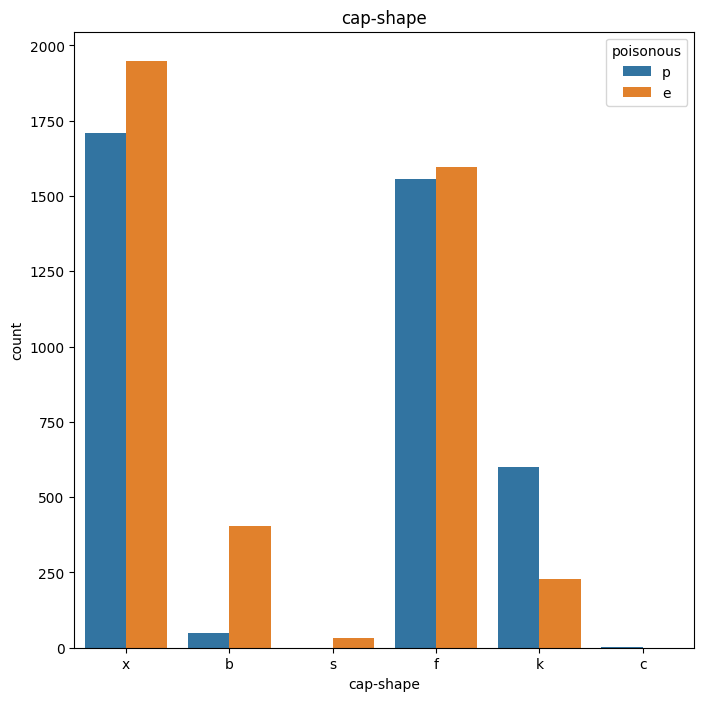

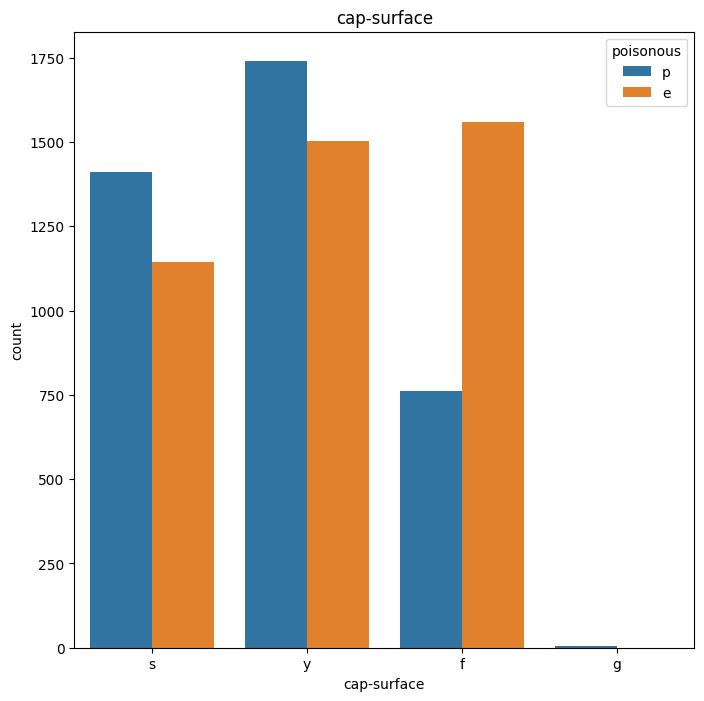

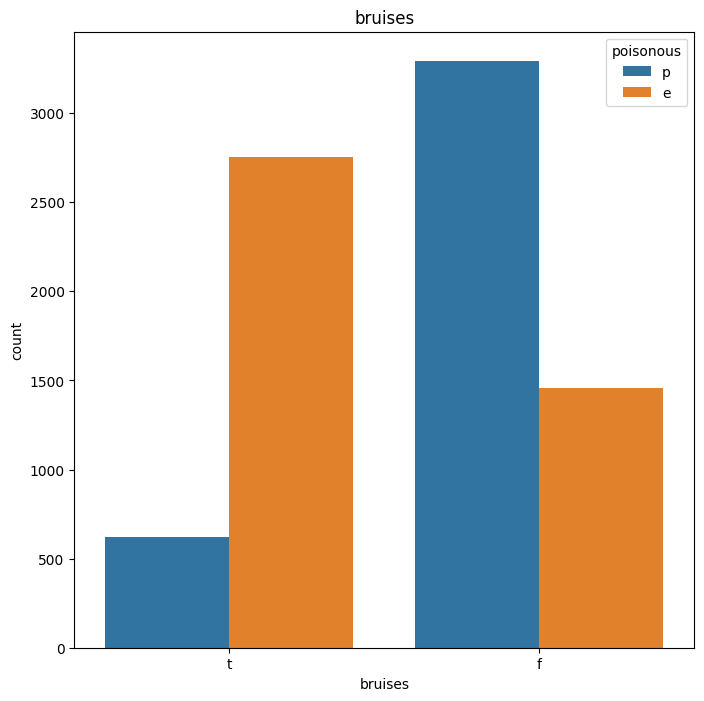

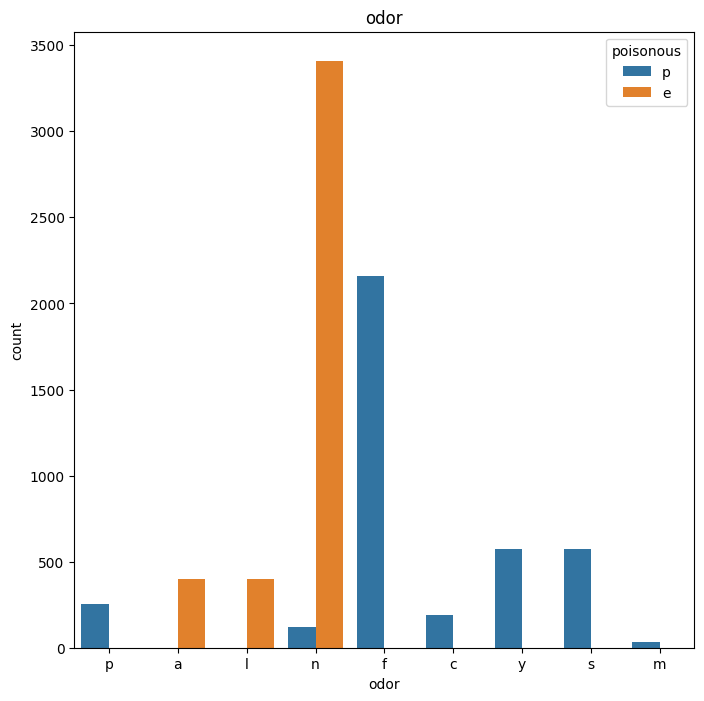

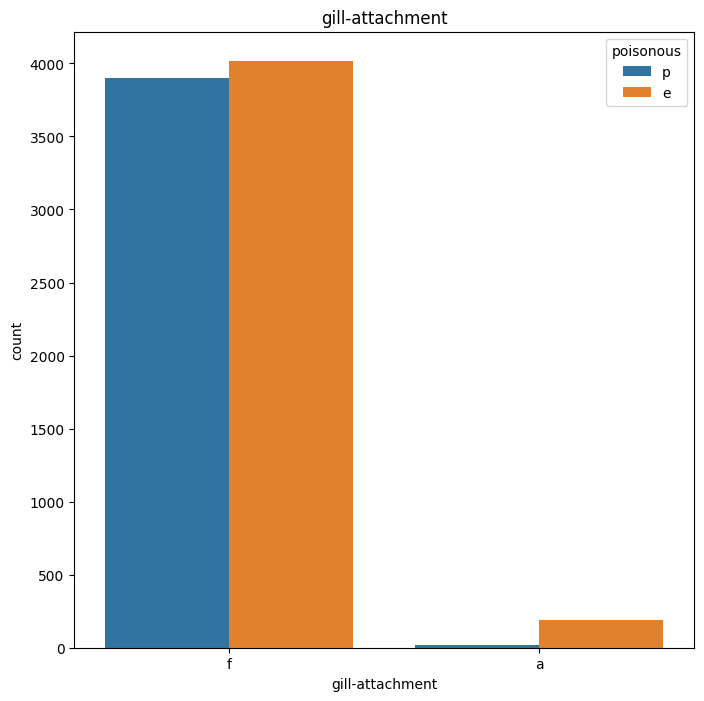

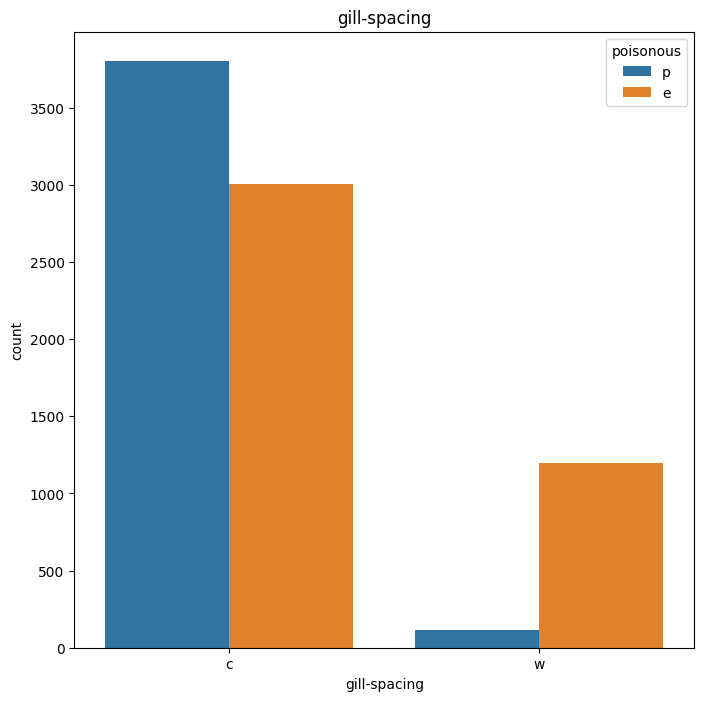

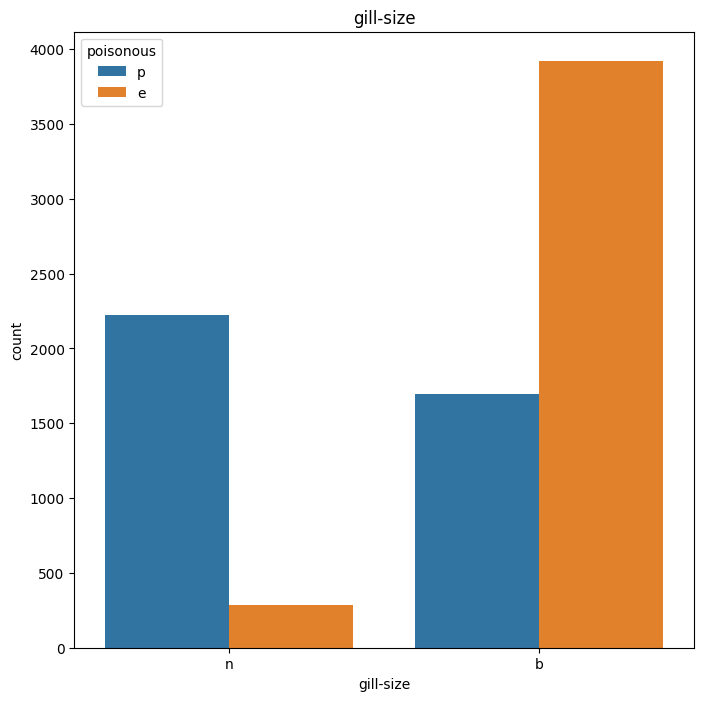

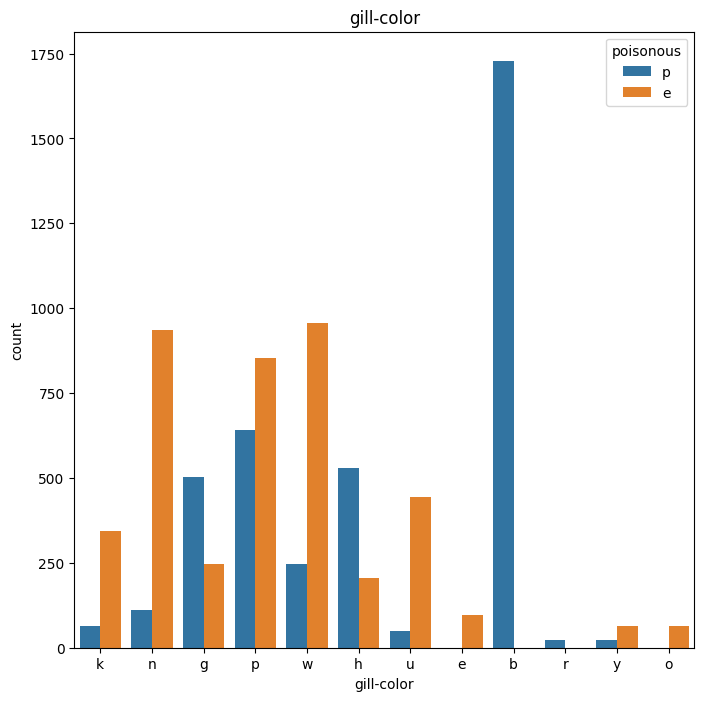

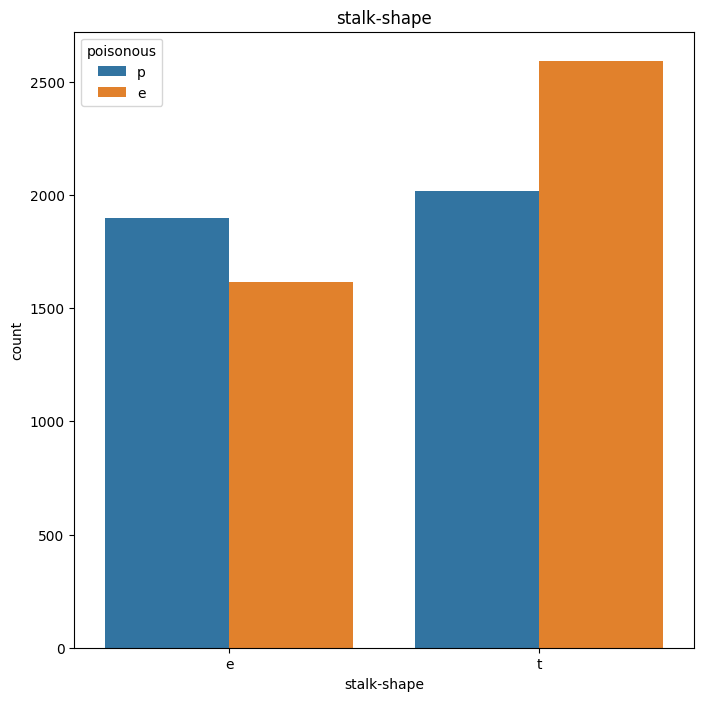

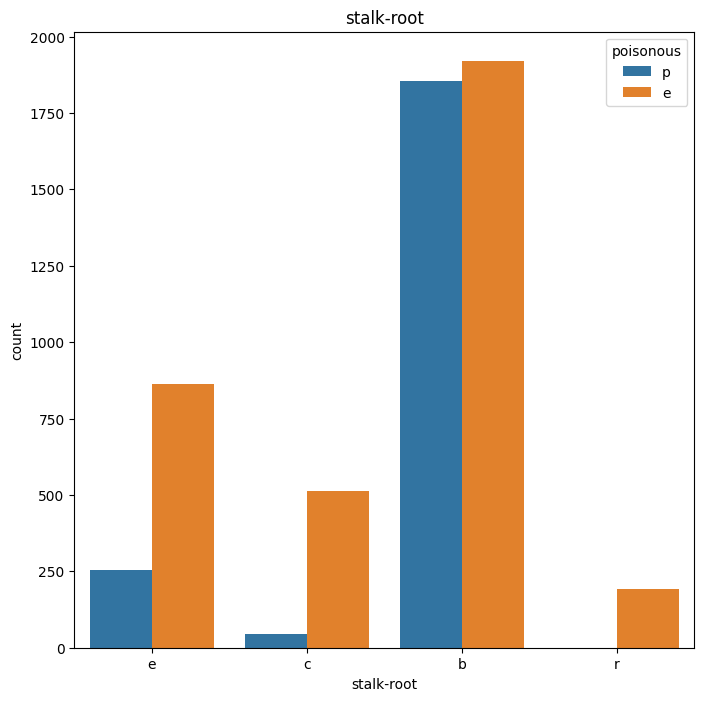

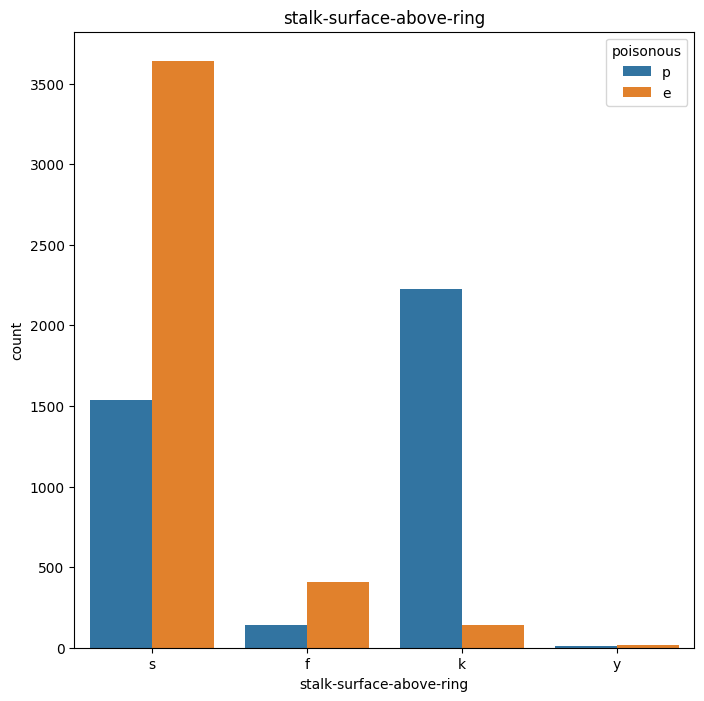

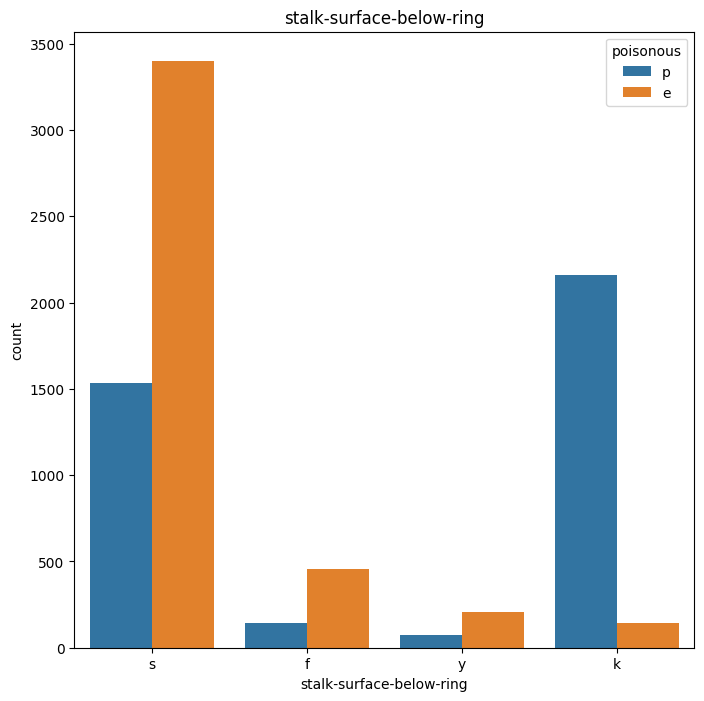

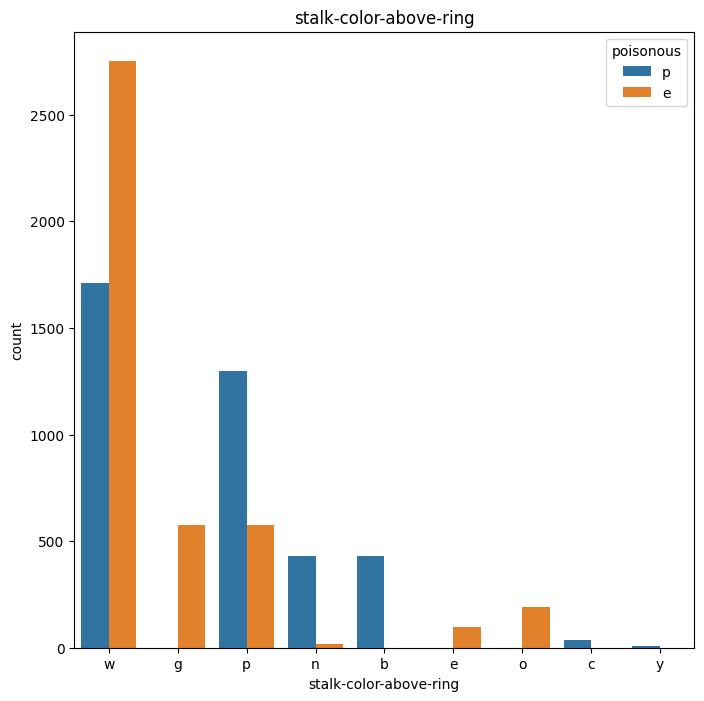

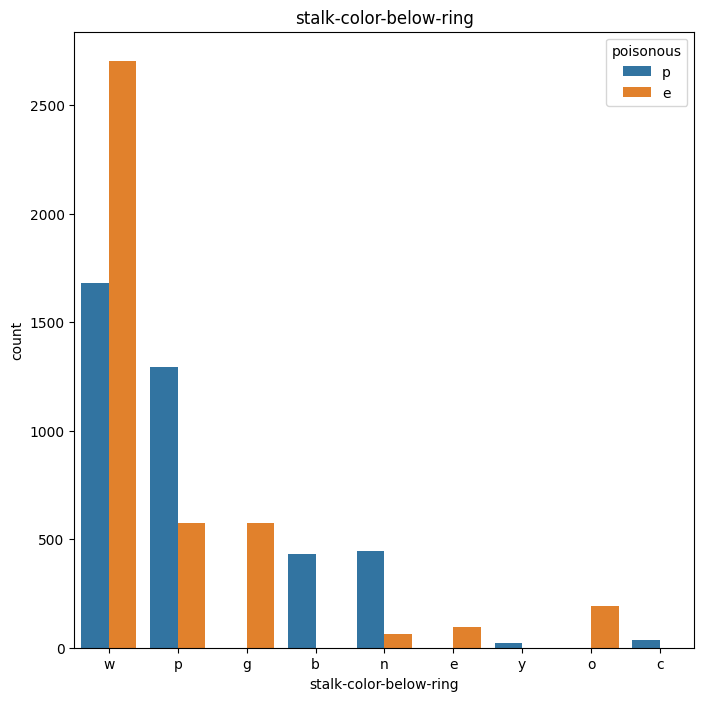

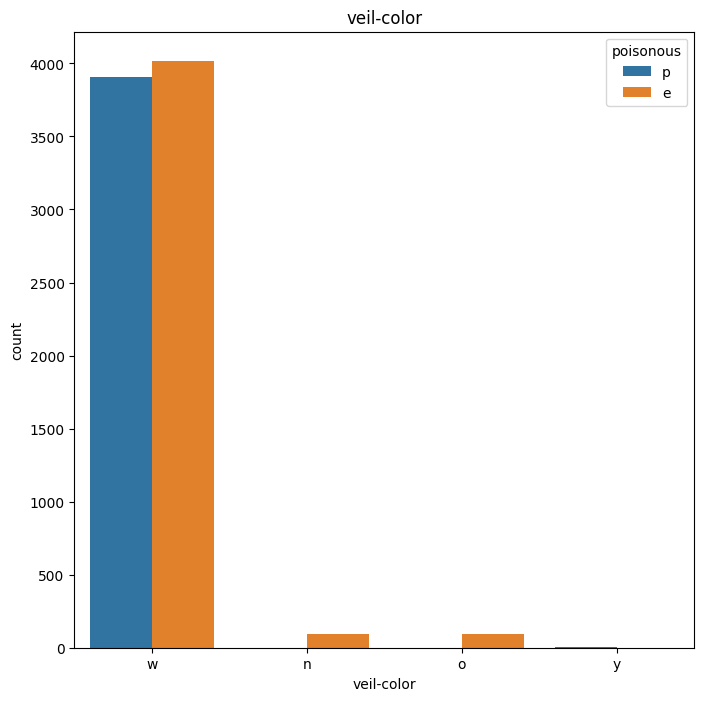

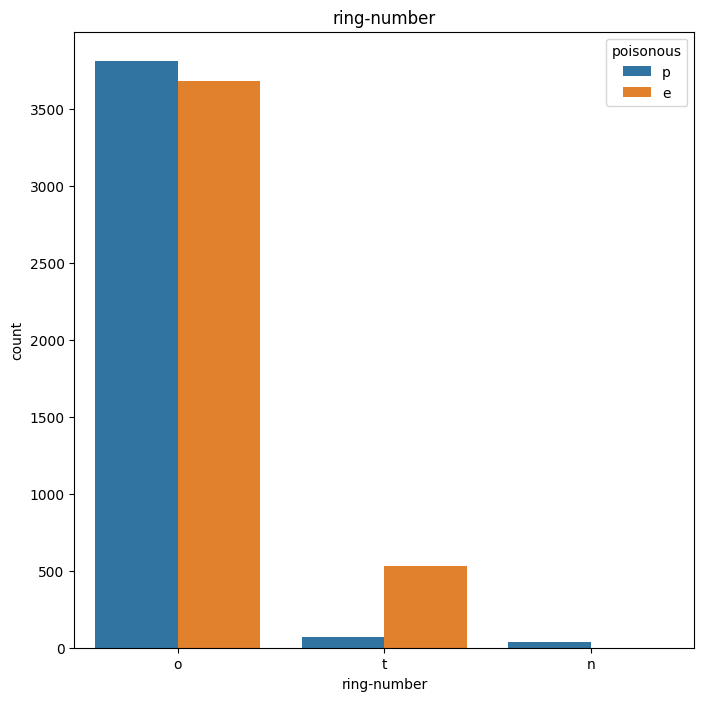

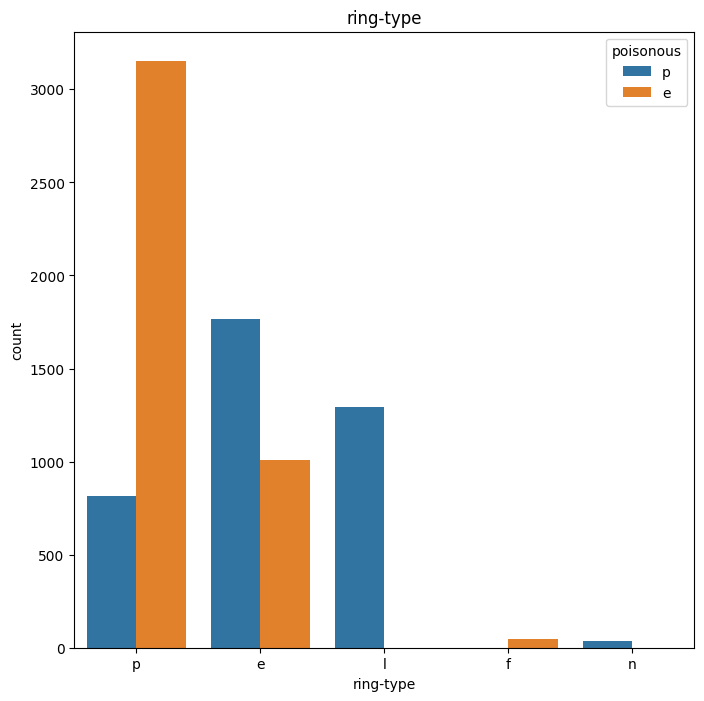

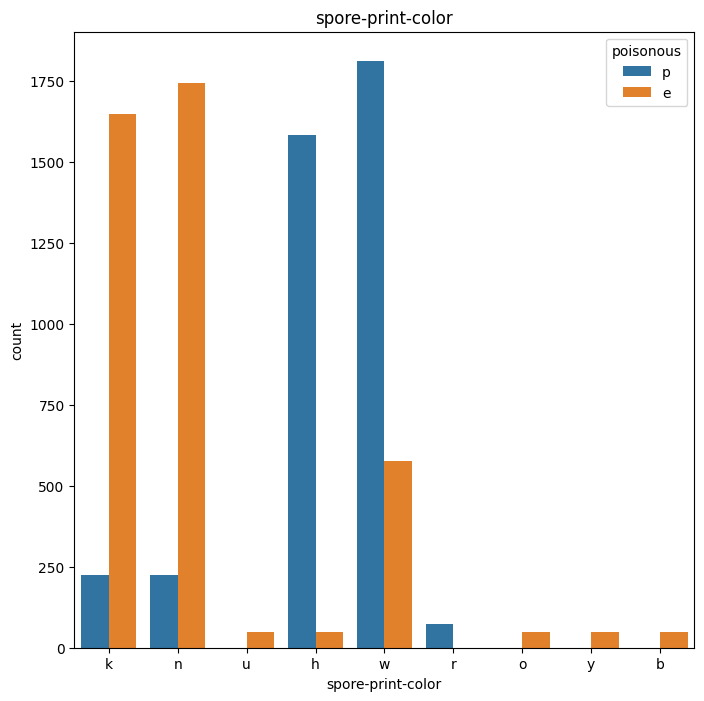

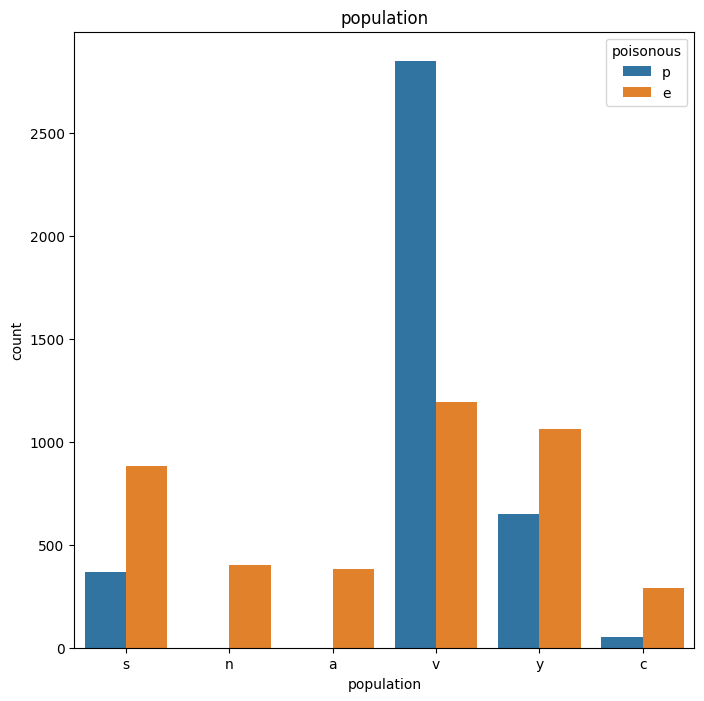

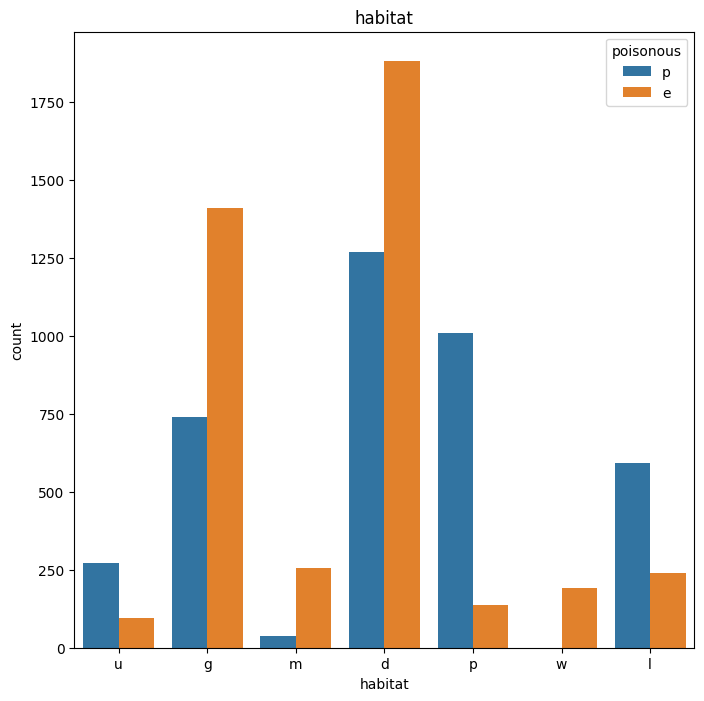

In [8]:
for column in categorical_colums.columns[1:]:
  plt.figure(figsize=(8, 8))
  sns.countplot(data=df, x=column, hue='poisonous')
  plt.title(f'{column}')
  plt.show()

#Пункт 2

2.1 Построение решающей функции по каждой переменной на основе частот

In [9]:
decision_functions = pd.DataFrame()
for column in df.columns[1:]:
  for value in df[column].unique():
    arr = df[df[column] == value]
    counts = arr['poisonous'].value_counts()
    res = {'e':0, 'p': 0}
    if 'e' in counts:
        res['e'] = counts['e']
    if 'p' in counts:
        res['p'] = counts['p']
    if res['e']> res['p']:
      res['prediction'] = 'e'
    else:
      res['prediction'] = 'p'
    decision_functions[f'{value}_from_{column}'] = res

decision_functions

,x_from_cap-shape,b_from_cap-shape,s_from_cap-shape,f_from_cap-shape,k_from_cap-shape,c_from_cap-shape,s_from_cap-surface,y_from_cap-surface,f_from_cap-surface,g_from_cap-surface,...,v_from_population,y_from_population,c_from_population,u_from_habitat,g_from_habitat,m_from_habitat,d_from_habitat,p_from_habitat,w_from_habitat,l_from_habitat
e,1948,404,32,1596,228,0,1144,1504,1560,0,...,1192,1064,288,96,1408,256,1880,136,192,240
p,1708,48,0,1556,600,4,1412,1740,760,4,...,2848,648,52,272,740,36,1268,1008,0,592
prediction,e,e,e,e,p,p,p,p,e,p,...,p,e,e,p,e,e,e,p,e,p


2.2 Вычисление точности каждого решения (на той же обучающей выборке). Нахождение наиболее информативной переменной (с минимальным числом ошибок)

In [10]:
accuracy_list = pd.DataFrame()
max_accuracy = 0
for column in df.columns[1:]:
  correct = 0
  for index, value in enumerate(df[column]):
    if decision_functions[f'{value}_from_{column}']['prediction'] == df['poisonous'][index]:
      correct += 1
  accuracy = correct/len(df)
  print(column, accuracy)
  if accuracy > max_accuracy:
    max_accuracy = accuracy
    answer = column
print(f'Наиболее информативная переменная: {answer}, accuracy: {max_accuracy}')

cap-shape 0.5642540620384048
cap-surface 0.5805022156573116
cap-color 0.5952732644017725
bruises 0.7439684884293452
odor 0.9852289512555391
gill-attachment 0.517971442639094
gill-spacing 0.6159527326440177
gill-size 0.7562776957163959
gill-color 0.8050221565731167
stalk-shape 0.5529295913343181
stalk-root 0.6459871984244214
stalk-surface-above-ring 0.7744953225012309
stalk-surface-below-ring 0.7661250615460364
stalk-color-above-ring 0.7163958641063516
stalk-color-below-ring 0.7144263909404235
veil-type 0.517971442639094
veil-color 0.5189561792220581
ring-number 0.5381585425898572
ring-type 0.7754800590841949
spore-print-color 0.8680452978828164
population 0.7218119153126539
habitat 0.690300344657804
Наиболее информативная переменная: odor, accuracy: 0.9852289512555391


#Пункт 3

3.1 Построение «наивный» байесовского классификатора из sklearn

In [11]:
encoded = df.copy()
label_encoder = LabelEncoder()
for column in encoded.columns:
    encoded[column] = label_encoder.fit_transform(encoded[column])
encoded

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [12]:
X = encoded.drop('poisonous', axis = 1)
y = encoded['poisonous']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = CategoricalNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

3.2 Оценка точности

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Оценка точности: {accuracy}')

Оценка точности: 0.947076923076923


#Пункт 4

Самостоятельно реализовать метод, не используя готовый. Сравнить полученное решение с библиотечным. Добавить регуляризатор в оценки частот.


In [15]:
encoded = df.copy()
encoded = pd.get_dummies(encoded, columns= encoded.columns[1:], drop_first = True)
encoded = encoded.sample(frac=1)
train_len = int(0.8 * len(encoded))
train = encoded[:train_len]
test= encoded[train_len:]

edible = train[train['poisonous'] == 'e'].drop('poisonous', axis = 1)
poisonous = train[train['poisonous'] == 'p'].drop('poisonous', axis = 1)

edible_prior = len(edible)/train_len
poisonous_prior = len(poisonous)/train_len

def classify(row):
  edible_prob = edible_prior
  poisonous_prob = poisonous_prior
  for column, value in row.items():
    if value == 1:
      edible_prob *= conditional_edible[column]
      poisonous_prob *= conditional_poisonous[column]
    else:
      edible_prob *= (1 - conditional_edible[column])
      poisonous_prob *= (1 - conditional_poisonous[column])
  if edible_prob > poisonous_prob:
    return 'e'
  else:
    return 'p'

for alpha in [0, 1, 0.5]:
  item_count = len(train.columns) - 1
  conditional_edible = (edible.sum() + alpha) / (len(edible) + alpha * item_count)
  conditional_poisonous = (poisonous.sum() + alpha) / (len(poisonous) + alpha * item_count)
  predictions = test.drop('poisonous', axis = 1).apply(classify, axis = 1)
  accuracy = (predictions == test['poisonous']).mean()
  X_train = train.drop('poisonous', axis = 1)
  y_train = train['poisonous']
  X_test = test.drop('poisonous', axis = 1)
  y_test = test['poisonous']
  clf = CategoricalNB(alpha = alpha)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy_real = accuracy_score(y_test, y_pred)
  print(f'alpha = {alpha}, My realization: {accuracy}, sklearn: {accuracy_real}')

alpha = 0, My realization: 0.9932307692307693, sklearn: 0.9932307692307693
alpha = 1, My realization: 0.9304615384615385, sklearn: 0.9304615384615385
alpha = 0.5, My realization: 0.9347692307692308, sklearn: 0.9353846153846154


#Пункт 5

 Применить метод логистической регрессии, использовав в качестве переменных оценки вероятностей, подвергнутые обратному логистическому преобразованию.


In [24]:
encoded = df.copy()
label_encoder = LabelEncoder()
for column in encoded.columns:
    encoded[column] = label_encoder.fit_transform(encoded[column])
    X1 = encoded.drop('poisonous', axis = 1)
y1 = encoded['poisonous']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)
clf = CategoricalNB()
clf.fit(X1_train, y1_train)
predictions = clf.predict_proba(X1)

def inverse_logistic_transform(probability):
  if (probability == 1 or probability == 0):
      return probability
  return np.log(probability / (1 - probability))

prob = pd.DataFrame()
prob['target'] = y
prob['e'] = [inverse_logistic_transform(sub[0]) for sub in predictions]
prob['p'] = [inverse_logistic_transform(sub[1]) for sub in predictions]

X2 = prob.drop('target', axis=1)
y2 = prob['target']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)

lr = LogisticRegression()
lr.fit(X2_train, y2_train)
y2_pred = lr.predict(X2_test)

accuracy = accuracy_score(y2_test, y2_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9735384615384616
